In [2]:
### Unsupervised Learning with training dataset Olivetti Faces dataset

In [41]:
from sklearn.datasets import fetch_olivetti_faces
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
Olv_faces=fetch_olivetti_faces()

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /Users/susann/scikit_learn_data


In [7]:
Olv_faces.keys()

dict_keys(['data', 'images', 'target', 'DESCR'])

In [8]:
Olv_faces.DESCR

'.. _olivetti_faces_dataset:\n\nThe Olivetti faces dataset\n--------------------------\n\n`This dataset contains a set of face images`_ taken between April 1992 and \nApril 1994 at AT&T Laboratories Cambridge. The\n:func:`sklearn.datasets.fetch_olivetti_faces` function is the data\nfetching / caching function that downloads the data\narchive from AT&T.\n\n.. _This dataset contains a set of face images: http://www.cl.cam.ac.uk/research/dtg/attarchive/facedatabase.html\n\nAs described on the original website:\n\n    There are ten different images of each of 40 distinct subjects. For some\n    subjects, the images were taken at different times, varying the lighting,\n    facial expressions (open / closed eyes, smiling / not smiling) and facial\n    details (glasses / no glasses). All the images were taken against a dark\n    homogeneous background with the subjects in an upright, frontal position \n    (with tolerance for some side movement).\n\n**Data Set Characteristics:**\n\n    ======

In [15]:
data_faces_array=Olv_faces.data
target_faces_array=Olv_faces.target
print(data_faces_array.shape)
print(target_faces_array.shape)
type(target_faces_array[0])

(400, 4096)
(400,)


numpy.int64

In [16]:
print(Olv_faces.DESCR)

.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and 
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: http://www.cl.cam.ac.uk/research/dtg/attarchive/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position 
    (with tolerance for some side movement).

**Data Set Characteristics:**

    =================   ===========

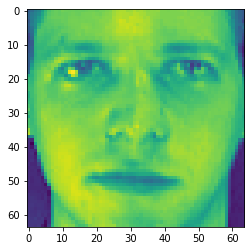

In [20]:
plt.imshow(data_faces_array[0].reshape(64,64))

In [21]:
from sklearn.model_selection import train_test_split
data_faces_train, data_faces_test, target_faces_train, target_faces_test  = train_test_split(data_faces_array, target_faces_array, shuffle=False)

In [23]:
print(data_faces_train.shape, target_faces_train.shape, data_faces_test.shape,target_faces_test.shape)

(300, 4096) (300,) (100, 4096) (100,)


In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(data_faces_train)

StandardScaler()

In [25]:
data_faces_train_scale = scaler.transform(data_faces_train)
data_faces_test_scale = scaler.transform(data_faces_test)

In [27]:
from sklearn import decomposition

In [49]:
pca = decomposition.PCA(n_components=20)
pca.fit(data_faces_train_scale)
data_faces_train_trans = pca.transform(data_faces_train_scale)

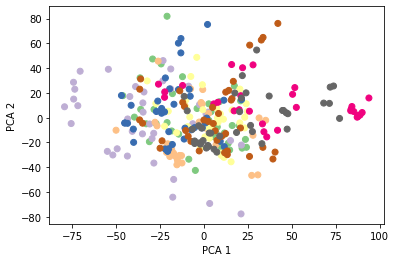

In [50]:
plt.scatter(data_faces_train_trans[:,0], data_faces_train_trans[:,1], c=target_faces_train, cmap='Accent')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

[0.23681833 0.14149478 0.07657562 0.05034184 0.03373946 0.02926981
 0.02660237 0.02510777 0.02070759 0.01830853 0.01651109 0.01513804
 0.01380454 0.01232975 0.01156964 0.00952021 0.00934269 0.00815497
 0.00777619 0.00745846]


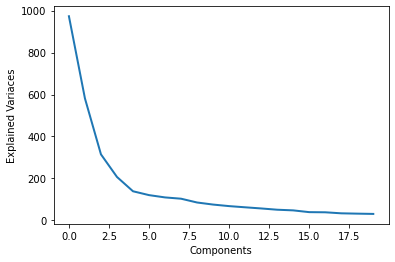

In [51]:
print(pca.explained_variance_ratio_)
plt.plot(pca.explained_variance_, linewidth=2)
 
plt.xlabel('Components')
plt.ylabel('Explained Variaces')
plt.show()

<AxesSubplot:title={'center':'Number of Samples for Each Classes'}, xlabel='subject ids'>

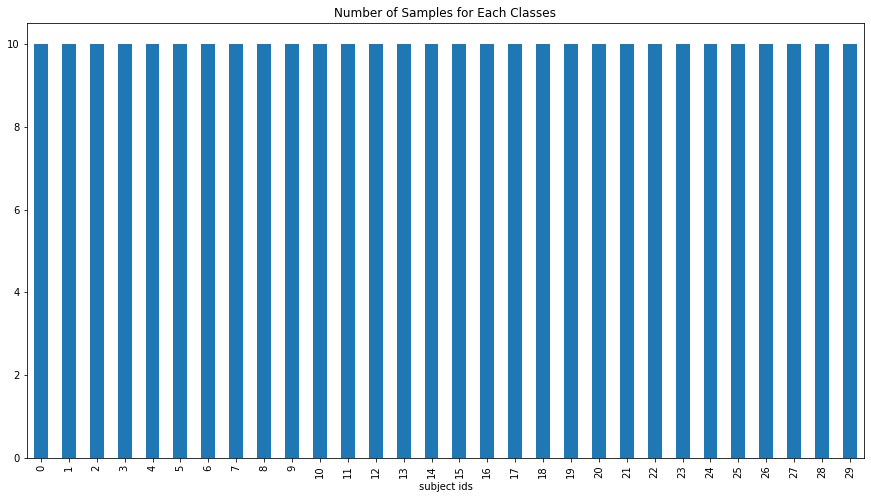

In [44]:
y_frame=pd.DataFrame()
y_frame['subject ids']=target_faces_train
y_frame.groupby(['subject ids']).size().plot.bar(figsize=(15,8),title="Number of Samples for Each Classes")